In [24]:
import click

@click.command()
@click.argument('zip1')
@click.argument('zip2')
@click.argument('mod', type=click.INT)
def sample(zip1, zip2, mod):
    print("zip1:", zip1)
    print("zip2:", zip2)
    print("mod:", mod)
    # TODO: finish this

@click.group()
def commands():
    pass

commands.add_command(sample)

if __name__ == "__main__":
    commands()
    
def zip_csv_iter(name):
    with ZipFile(name) as zf:
        with zf.open(name.replace(".zip", ".csv")) as f:
            reader = csv.reader(TextIOWrapper(f))
            for row in reader:
                yield row

Usage: ipykernel_launcher.py [OPTIONS] COMMAND [ARGS]...
Try 'ipykernel_launcher.py --help' for help.

Error: no such option: -f
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/novac/.local/lib/python3.6/site-packages/click/parser.py", line 416, in _process_opts
    self._match_long_opt(norm_long_opt, explicit_value, state)
  File "/home/novac/.local/lib/python3.6/site-packages/click/parser.py", line 326, in _match_long_opt
    raise NoSuchOption(opt, possibilities=possibilities, ctx=self.ctx)
click.exceptions.NoSuchOption: no such option: -f

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/novac/.local/lib/python3.6/site-packages/click/core.py", line 781, in main
    with self.make_context(prog_name, args, **extra) as ctx:
  File "/home/novac/.local/lib/python3.6/site-packages/click/core.py", line 700, in make_context
    self.parse_args(ctx, args)
  File "/home/novac/.local/lib/python3.6/site-packages/click/core.py", line 1212, in parse_args
    rest = Command.parse_args(self, ctx, args)
  File "/home/novac/.local/lib/python3.6/site-package

TypeError: must be str, not list

In [2]:
import csv
import io


def zip_csv_iter(name):
    with ZipFile(name) as zf:
        with zf.open(name.replace(".zip", ".csv")) as f:
            reader = csv.reader(io.TextIOWrapper(f))
            for row in reader:
                yield row

In [3]:
import socket, struct
from operator import itemgetter
from time import time

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [116]:
start = time()
reader = zip_csv_iter("jan1.zip")
header = next(reader)
ip_idx = header.index("ip")
rows = list(reader)
for item in rows:
    item[14] = item[0]
    new = item[0][:-3]
    new = new + '000'
    item[0] = ip2long(new)
rows = sorted(rows, key=itemgetter(0))
for item in rows:
    item[0] = item[14]
    item.pop(-1)
end = time()
print(end-start)

1.8934850692749023


In [117]:
start = time()
reader = zip_csv_iter("jan1.zip")
header = next(reader)
ip_idx = header.index("ip")
rows = list(reader)
for item in rows:
    new = item[0][:-3]
    new = new + '000'
    item[14] = ip2long(new)
rows = sorted(rows, key=itemgetter(14))
for item in rows:
    item.pop(-1)
end = time()
print(end-start)

1.862168550491333


In [141]:
import re

string = "12.34.56.Rdty"
string = re.sub(r"[a-zA-Z]+$", "000", string)
print(string)

12.34.56.000


In [47]:
from zipfile import ZipFile

reader = zip_csv_iter("jan1.zip")
header = next(reader)
ip_idx = header.index("ip")
rows = list(reader)
for item in rows:
    new = item[0][:-3]
    new = new + '000'
    item.append(ip2long(new))
rows = sorted(rows, key=itemgetter(15))
# for item in rows:
#     item.pop(-1)
header.append('country')
print(header)

['ip', 'date', 'time', 'zone', 'cik', 'accession', 'extention', 'code', 'size', 'idx', 'norefer', 'noagent', 'find', 'crawler', 'browser', 'country']


In [54]:
from io import TextIOWrapper
import re

def zip_csv_iter(name):
    with ZipFile(name) as zf:
        with zf.open(name.replace(".zip", ".csv")) as f:
            reader = csv.reader(TextIOWrapper(f))
            for row in reader:
                yield row
                
def zip_csv_iterIP2(name):
    with ZipFile(name) as zf:
        with zf.open(name[:-4]) as f:
            reader = csv.reader(TextIOWrapper(f))
            for row in reader:
                yield row

with ZipFile("sorted.zip", "w") as zf:
    with zf.open("sorted.csv", "w") as raw:
        with TextIOWrapper(raw) as f:
            writer = csv.writer(f)

            reader = zip_csv_iter("jan1.zip")
            header = next(reader)
            writer.writerow(header)
            ip_idx = header.index("ip")
            rows = list(reader)
            for item in rows:
                new = re.sub(r"[a-zA-Z]+$", "000", item[0])
                item[14] = ip2long(new)
            rows = sorted(rows, key=itemgetter(14))
            for item in rows:
                item.pop(-1)
                writer.writerow(item)
                    

with ZipFile("countriesTEST.zip", "w") as zf:
    with zf.open("countriesTEST.csv", "w") as raw:
        with TextIOWrapper(raw) as f:
            writer = csv.writer(f)

            reader = zip_csv_iter("sorted.zip")
            header = next(reader)
            header.append('country')
            writer.writerow(header)
            rows = list(reader)

            IP2 = zip_csv_iterIP2("IP2LOCATION-LITE-DB1.CSV.ZIP")
            IP2rows = list(IP2)

            index = 0
            for item in rows:
                new = item[0][:-3]
                new = new + '000'
                ip = ip2long(new)
                if ip <= int(IP2rows[index][1]):
                    item.append(IP2rows[index][3])
                else:
                    index += 1
                    while ip < int(IP2rows[index][0]):
                        index += 1
                    item.append(IP2rows[index][3])

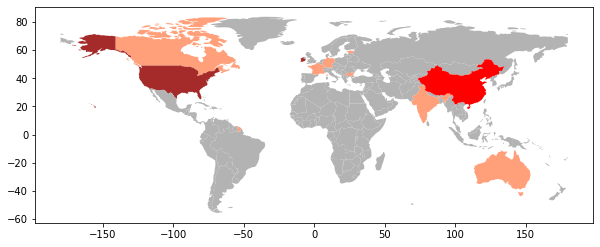

In [128]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML
import geopandas

def world():
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world.set_index("name", drop=False, inplace=True)
    return world[world["continent"] != "Antarctica"]

hours = list(range(0,23))
reader = zip_csv_iter("countries.zip")
header = next(reader)
cidx = header.index("country")
counts = defaultdict(int)
rows = list(reader)
w = world()
fig, ax = plt.subplots(figsize=(10,10))

def draw_frame(frame_num):
    ax.cla()
    counts = defaultdict(int)
    for row in rows:
        iptime = int(re.findall(r"^[0-9]+", row[2])[0])
        if iptime == int(frame_num):
            counts[row[cidx]] += 1

    # add color column that defaults gray, but set
    # to shade of red for higher request counts
    w["color"] = "0.7"

    for country, count in counts.items():
        # sometimes country names in IP dataset don't
        # match names in naturalearth_lowres -- skip those
        if not country in w.index:
            continue

        color = "lightsalmon" # >= 1
        if count >= 20:
            color = "orange"
        if count >= 40:
            color = "tomato"
        if count >= 60:
            color = "red"
        if count >= 80:
            color = "brown"
#         if count >= 100:
#             color = "black"
        w.at[country, "color"] = color

    w.plot(ax=ax, color=w["color"], legend=True, figsize=(16, 4))

anim = FuncAnimation(fig, draw_frame, frames=23, interval=250)
html = anim.to_html5_video()
HTML(html)

In [97]:
index = list(range(0,24))
print(index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
